In [9]:
import numpy as np
import pandas as pd
import json
import datetime
import nltk
from nltk.corpus import stopwords
from operator import itemgetter 
import matplotlib.pyplot as plt

In [5]:
with open('submission/data.json') as file:
    data = file.read()
    new_data = data.replace('}{', '},{')
    json_data = json.loads(f'[{new_data}]')
    
submission = pd.DataFrame.from_records(json_data)

submission_timed = submission
submission_timed['time'] = pd.to_datetime(submission['time'])

In [41]:
stock_list = ['GME', 'AMC','NAKD']
close = {}


for stock in stock_list:
    raw = pd.read_csv(stock+'.csv')
    timed = raw 
    timed['Date'] = pd.to_datetime(timed['Date'])

    date = raw['Date'].to_list()
    close[stock] = raw['Adj Close'].to_list()

In [44]:
len(gme_date)

126

In [45]:
submission_wsb = submission_timed[submission_timed['time'] >= datetime.date(2020,8,13)]

/Users/xiaoyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [48]:
import collections

date2submission = {}
date2count = collections.defaultdict(dict)


for date in date:
    date2submission[date] = submission_gme[submission_gme['time'] == date]
    for stock in stock_list:
        date2count[stock][date] = date2submission[date]['title'].str.lower().str.count(stock.lower()).sum()

In [51]:
count = {}

for stock in stock_list:
    count[stock] = [x for x in date2count[stock].values()]

In [52]:
from scipy.stats import pearsonr

for stock in stock_list:
    corr, _ = pearsonr(count[stock][:-1],close[stock][1:])
    print('For stock '+stock+' Pearson correlation between number of occurence and closing price the next day is '+str(corr))

For stock GME Pearson correlation between number of occurence and closing price the next day is 0.7703570005900581
For stock AMC Pearson correlation between number of occurence and closing price the next day is 0.55164867195274
For stock NAKD Pearson correlation between number of occurence and closing price the next day is 0.5627607481362962


The pearson correlation coefficient between the number of occurrences of stock name in title and the closing price next day are high for the three stocks considered, which suggests that they are closely correlated. This shows the potential of building a prediction model with features generated from r/wallstreetbets

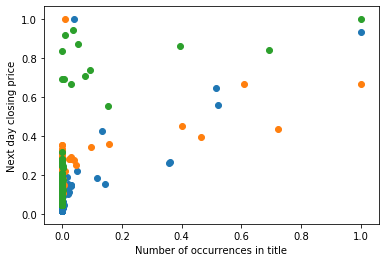

In [60]:
#from sklearn.preprocessing import normalize

#normalized_count = count
#normalized_close = close

#for stock in stock_list:
#    normalized_count[stock] = normalize(normalized_count[stock])
#    normalized_close[stock] = normalize(normalized_close[stock])



for stock in stock_list:
    count_stock = np.array(count[stock][:-1])
    close_stock = np.array(close[stock][1:])
    plt.scatter(count_stock/max(count_stock), close_stock/max(close_stock))

plt.xlabel('Number of occurrences in title')
plt.ylabel('Next day closing price')
plt.show()


The above plot shows the closing price on the next day with respect to number of occurrences in the title in the previous day. Both quantities are normalized by their highest values. There seems be a correlation between these two quantities.